## 1η Εργασία - Αναγνώριση Προτύπων
### Ανδριώτης Νικόλαος (9472)
### Ρίζος Λεωνίδας (9591)

## Μέρος Ανάλυσης Εκφώνησης
---

#### Η εκφώνηση της εργασίας μας δίνει τα εξής δεδομένα:

1. Οι συναρτήσεις πυκνότητας πιθανότητας για τις δύο κλάσεις, $ω_1$ (υγιής) και $ω_2$ (πιθανή ύπαρξη καρκίνου) ακολουθούν γκαουσιανές κατανομές.


2. Οι μέσες τιμές τους είναι $\vec{μ_1} = (0.4, 0.8)$ και $\vec{μ_2} = (1.5, 2.7)$ αντίστοιχα.

3. Έχουν κοινό πίνακα συμμεταβλητότητας $Σ = \left(\begin{array}{cc} 
1.5 & 0\\
0 & 0.8
\end{array}\right)$.

4. Οι a priori πιθανότητες των κλάσεων ειναι $P(ω_1) = 0.95$ και $P(ω_2) = 0.05$ αντίστοιχα.

In [1]:
# Εισάγουμε τις κατάλληλες βιβλιοθήκες
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

# Αποθήκευσε τις μέσες τιμές και τον πίνακα συμμεταβλητότητας
m1 = np.array([0.4, 0.8])
m2 = np.array([1.5, 2.7])
S = np.array([[1.5, 0], [0, 0.8]])

# Αποθήκευσε τις a prior πιθανότητες
healthy_prior = 0.95
sick_prior = 0.05

"""
Είναι γνωστό από την θεωρία, πως σε μια οποιαδήποτε γκαουσιανή
κατανομή, υπάρχει 99.73% πιθανότητα, η τυχαία μεταβλητή
να πάρει τιμές στο εύρος [μ - 3σ, μ + 3σ].
Λόγω αυτού, ορίζουμε το πλέγμα μας αντίστοιχα, ξεχωριστά
για κάθε αιματολογικό δείκτη.
"""
s1, s2 = np.sqrt(S)[0][0], np.sqrt(S)[1][1]
lim1 = np.ceil(m1[0] + 3 * s1), np.ceil(m1[1] + 3 * s2)
lim2 = np.ceil(m2[0] + 3 * s1), np.ceil(m2[1] + 3 * s2)
lim = np.maximum(lim1, lim2)

# Όρισε βήμα 0.01 όπως είναι και στις κανονικές εξετάσεις
step = 0.01

# Φτίαξε ένα πλέγμα που ξεκινάει απο το 0.01 μέχρι και το μέγιστο μεταξύ των δύο δεικτών
grid = np.dstack(np.mgrid[step:lim[0]:step, step:lim[1]:step])

## Μέρος Α
---

### 1. Μαθηματικό Υπόβαθρο και Υλοποίηση
Σύμφωνα με τα παραπάνω, θεωρούμε τα εξής:

1. $p(\vec{x} | ω_1) = Ν(\vec{μ_1}, Σ)$
2. $p(\vec{x} | ω_2) = Ν(\vec{μ_2}, Σ)$

In [2]:
healthy_likelihood = multivariate_normal.pdf(x=grid, mean=m1, cov=S)
sick_likelihood = multivariate_normal.pdf(x=grid, mean=m2, cov=S)

### 1. Παρουσίαση Ιατρικών Αποτελεσμάτων

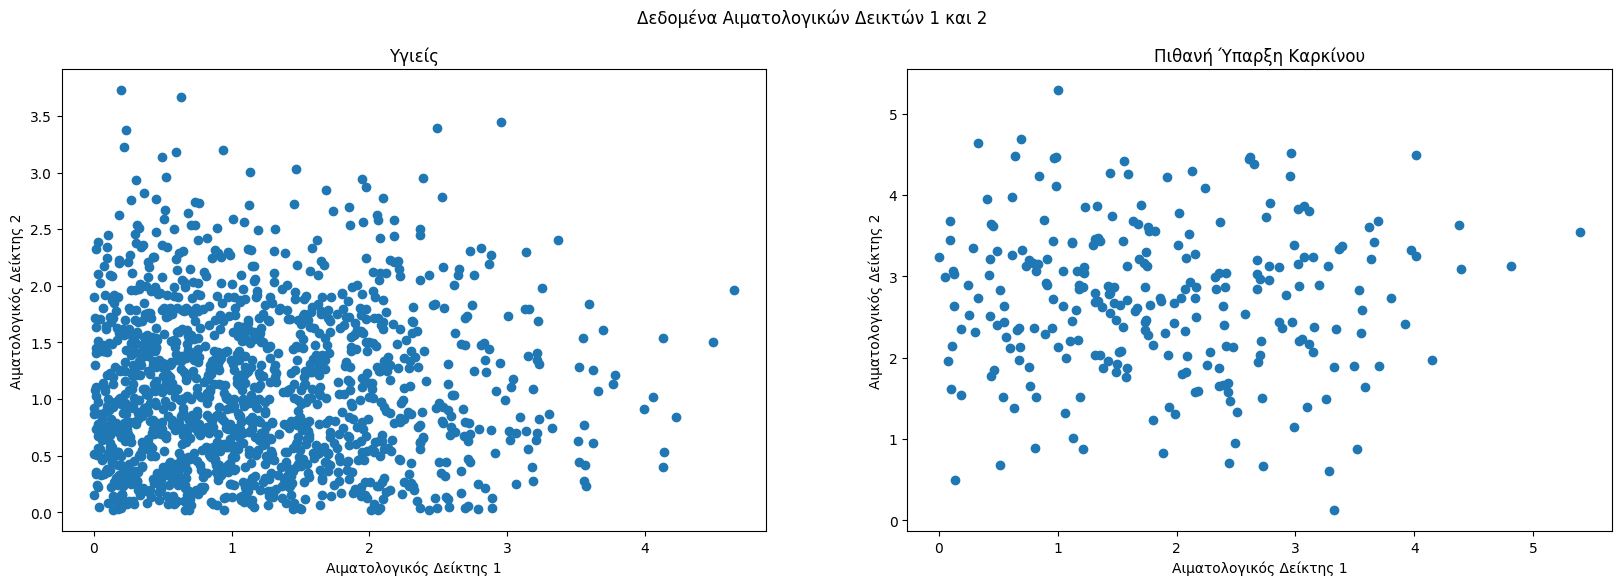

In [3]:
healthy_samples = np.random.multivariate_normal(mean=m1,cov=S, size=2700)
sick_samples = np.random.multivariate_normal(mean=m2,cov=S, size=300)
p_healthy_samples = healthy_samples[np.all(healthy_samples > 0, axis=1)]
p_sick_samples = sick_samples[np.all(sick_samples > 0, axis=1)]
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

fig.suptitle('Δεδομένα Αιματολογικών Δεικτών 1 και 2')

axs[0].scatter(p_healthy_samples[:, 0], p_healthy_samples[:, 1])
axs[0].set_title('Υγιείς')
axs[0].set_xlabel('Αιματολογικός Δείκτης 1')
axs[0].set_ylabel('Αιματολογικός Δείκτης 2')

axs[1].scatter(p_sick_samples[:, 0], p_sick_samples[:, 1])
axs[1].set_title('Πιθανή Ύπαρξη Καρκίνου')
axs[1].set_xlabel('Αιματολογικός Δείκτης 1')
axs[1].set_ylabel('Αιματολογικός Δείκτης 2')

plt.show()

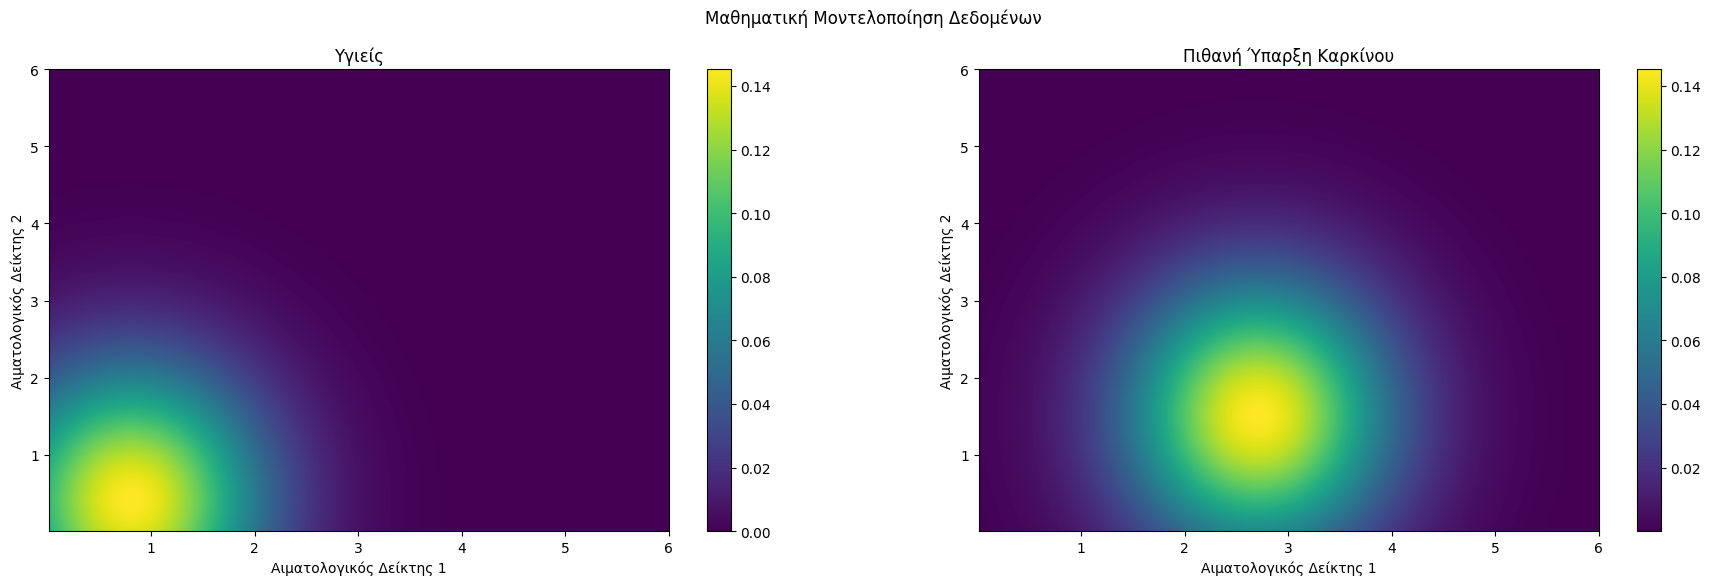

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

fig.suptitle('Μαθηματική Μοντελοποίηση Δεδομένων')

im1 = ax1.imshow(healthy_likelihood, origin='lower', extent=[0.01,lim[0],0.01,lim[1]], aspect="auto")
ax1.set_title('Υγιείς')
ax1.set_xlabel('Αιματολογικός Δείκτης 1')
ax1.set_ylabel('Αιματολογικός Δείκτης 2')
plt.colorbar(im1, ax=ax1)


im2 = ax2.imshow(sick_likelihood, origin='lower', extent=[0.01,lim[0],0.01,lim[1]], aspect="auto")
ax2.set_title('Πιθανή Ύπαρξη Καρκίνου')
ax2.set_xlabel('Αιματολογικός Δείκτης 1')
ax2.set_ylabel('Αιματολογικός Δείκτης 2')
plt.colorbar(im2, ax=ax2)
plt.show()

In [5]:
# Η block_reduce κάνει το αντίστοιχο mean pool με block size κάποιες
# σταθερές. Επιλέξαμε τις σταθερές bs1 και bs2 να είναι πολ/σια
# της τυπικής απόκλισης. Αυτό επιλέχθηκε για να μπορούμε
# βλέποντας τα παρακάτω γραφήματα, να ξέρουμε πως κάθε μετακίνηση ίση με
# τρία κουτία ισούται με μετακίνηση +σ.

from skimage.measure import block_reduce
bs1, bs2 = int(np.floor(np.sqrt(S) / step)[0, 0] / 3), int(np.floor(np.sqrt(S) / step)[1, 1] / 3)

healthy_reduced = block_reduce(healthy_likelihood,
                       block_size=(bs1, bs2),
                       func=np.mean,
                       cval=np.mean(healthy_likelihood))

sick_reduced = block_reduce(sick_likelihood,
                       block_size=(bs1, bs2),
                       func=np.mean,
                       cval=np.mean(sick_likelihood))

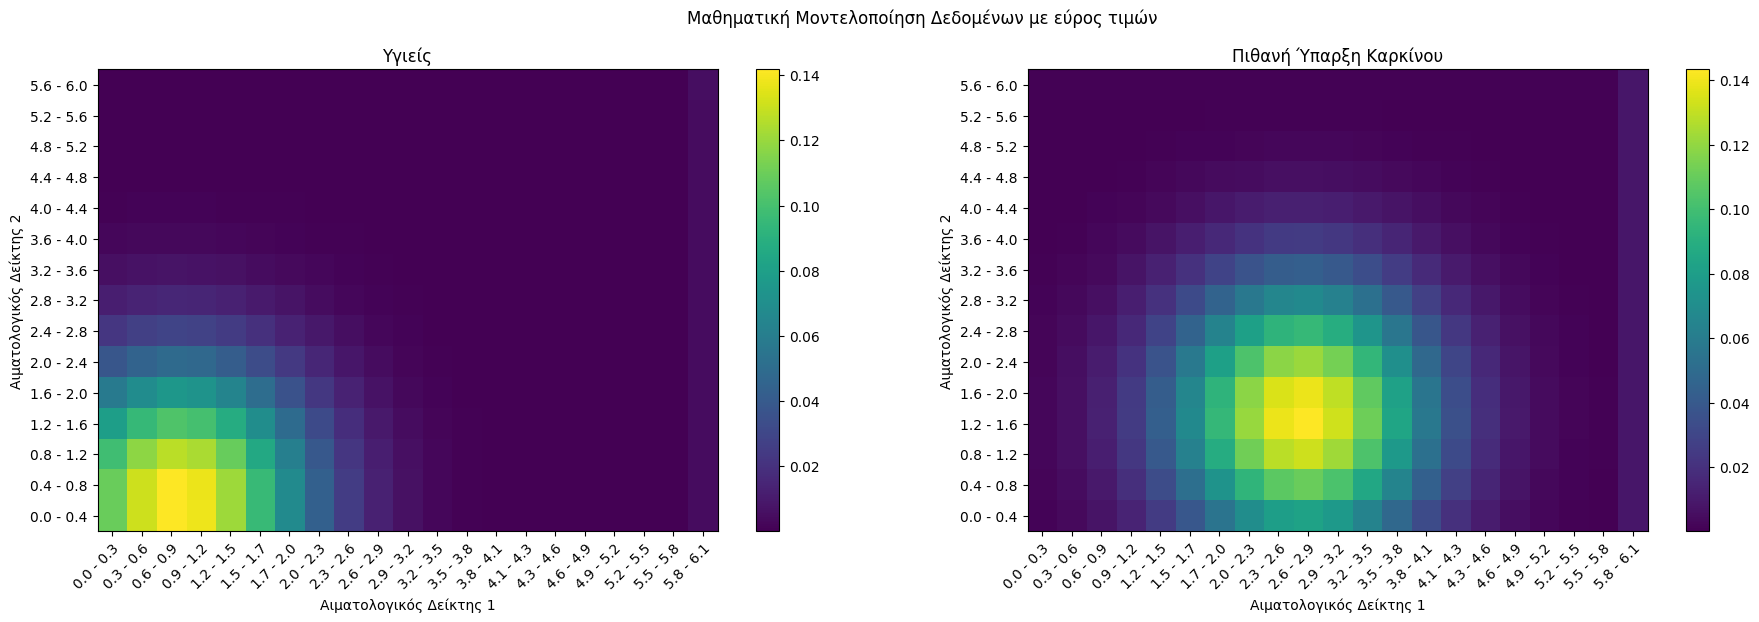

In [6]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))
fig.suptitle('Μαθηματική Μοντελοποίηση Δεδομένων με εύρος τιμών')

bs1_labels = []
for i in range(healthy_reduced.shape[0]):
    bs1_labels.append(f'{i* step * bs1:.1f} - {(i+1) * step * bs1:.1f}')

bs2_labels = []
for i in range(healthy_reduced.shape[1]):
    bs2_labels.append(f'{i* step * bs2:.1f} - {(i+1) * step * bs2:.1f}')

ax1.set_xticks(ticks=np.arange(len(bs2_labels)))
ax1.set_xticklabels(bs2_labels)
ax1.set_xlabel('Αιματολογικός Δείκτης 1')
ax1.set_ylabel('Αιματολογικός Δείκτης 2')
ax1.set_yticks(ticks=np.arange(len(bs1_labels)))
ax1.set_yticklabels(bs1_labels)
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

ax1.set_title("Υγιείς")
im1 = ax1.imshow(healthy_reduced, origin='lower', aspect="auto")
plt.colorbar(im1 ,ax=ax1)

ax2.set_xticks(ticks=np.arange(len(bs2_labels)))
ax2.set_xticklabels(bs2_labels)
ax2.set_xlabel('Αιματολογικός Δείκτης 1')
ax2.set_ylabel('Αιματολογικός Δείκτης 2')
ax2.set_yticks(ticks=np.arange(len(bs1_labels)))
ax2.set_yticklabels(bs1_labels)
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

ax2.set_title("Πιθανή Ύπαρξη Καρκίνου")
im2 = ax2.imshow(sick_reduced, origin='lower', aspect="auto")
plt.colorbar(im2 ,ax=ax2)

plt.show()

### 2. Μαθηματικό Υπόβαθρο και Υλοποίηση
Υπολογίζουμε την ολική κατανομή πιθανότητας με τον παρακάτω τύπο:
$$ p(x) =  \sum_{i=1}^2 p(x|ω_i)P(ω_i)$$

In [7]:
evidence = healthy_likelihood * healthy_prior + sick_likelihood * sick_prior

### 2. Παρουσίαση Ιατρικών Αποτελεσμάτων

Αφού την σχεδιάσαμε, παρατηρήσαμε πως τιμές των αιματολογικων δεικτών πάνω απο 3.5, είναι πάρα πολύ απίθανες, και αν κάποιος ασθενής εμφανίσει τέτοια αποτελέσματα
μπορούμε να υποθέσουμε δύο πράγματα:

1. Υπάρχει σφάλμα απο το μηχάνημα
2. Η αιμοληψία παρουσίασε κάποιο σφάλμα

Και στις δυο περιπτώσεις, απαιτείται επανάληψη της αιμοληψίας. Συνέπως, από εδώ και για την υπόλοιπη ανάλυση, θα θεωρήσουμε πως τα ρεαλιστικά όρια των δεικτών είναι 3.5.

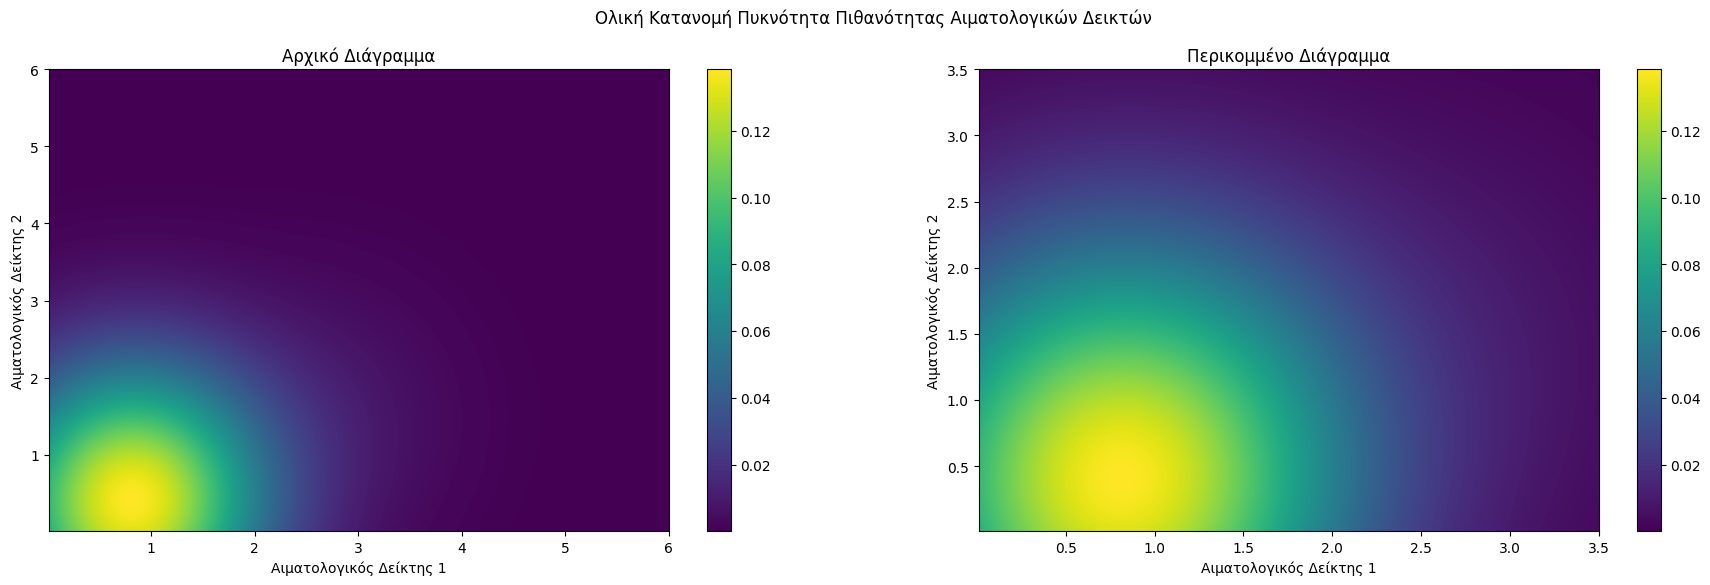

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

fig.suptitle('Ολική Κατανομή Πυκνότητα Πιθανότητας Αιματολογικών Δεικτών')

im1 = ax1.imshow(evidence, origin='lower', extent=[0.01,lim[0],0.01,lim[1]], aspect='auto')
ax1.set_title('Αρχικό Διάγραμμα')
ax1.set_xlabel('Αιματολογικός Δείκτης 1')
ax1.set_ylabel('Αιματολογικός Δείκτης 2')
plt.colorbar(im1, ax=ax1)


im2 = ax2.imshow(evidence, origin='lower', extent=[0.01,lim[0],0.01,lim[1]], aspect='auto')
ax2.set_xlim([0.01, 3.5])
ax2.set_ylim([0.01, 3.5])
ax2.set_title('Περικομμένο Διάγραμμα')
ax2.set_xlabel('Αιματολογικός Δείκτης 1')
ax2.set_ylabel('Αιματολογικός Δείκτης 2')
plt.colorbar(im2, ax=ax2)
plt.show()

### 3. Μαθηματικό Υπόβαθρο και Υλοποίηση
Υπολογίζουμε τις a posteriori πιθανότητες $P(ω_1 | \vec{x})$ και $P(ω_2 | \vec{x})$ με την παρακάτω εξίσωση:

$$ P(ω_i|x) = {p(x|ω_i)P(ω_j) \over p(x)} $$

In [9]:
healthy_posterior = (healthy_likelihood * healthy_prior) / evidence
sick_posterior = (sick_likelihood * sick_prior) / evidence

### 3. Παρουσίαση Ιατρικών Αποτελεσμάτων

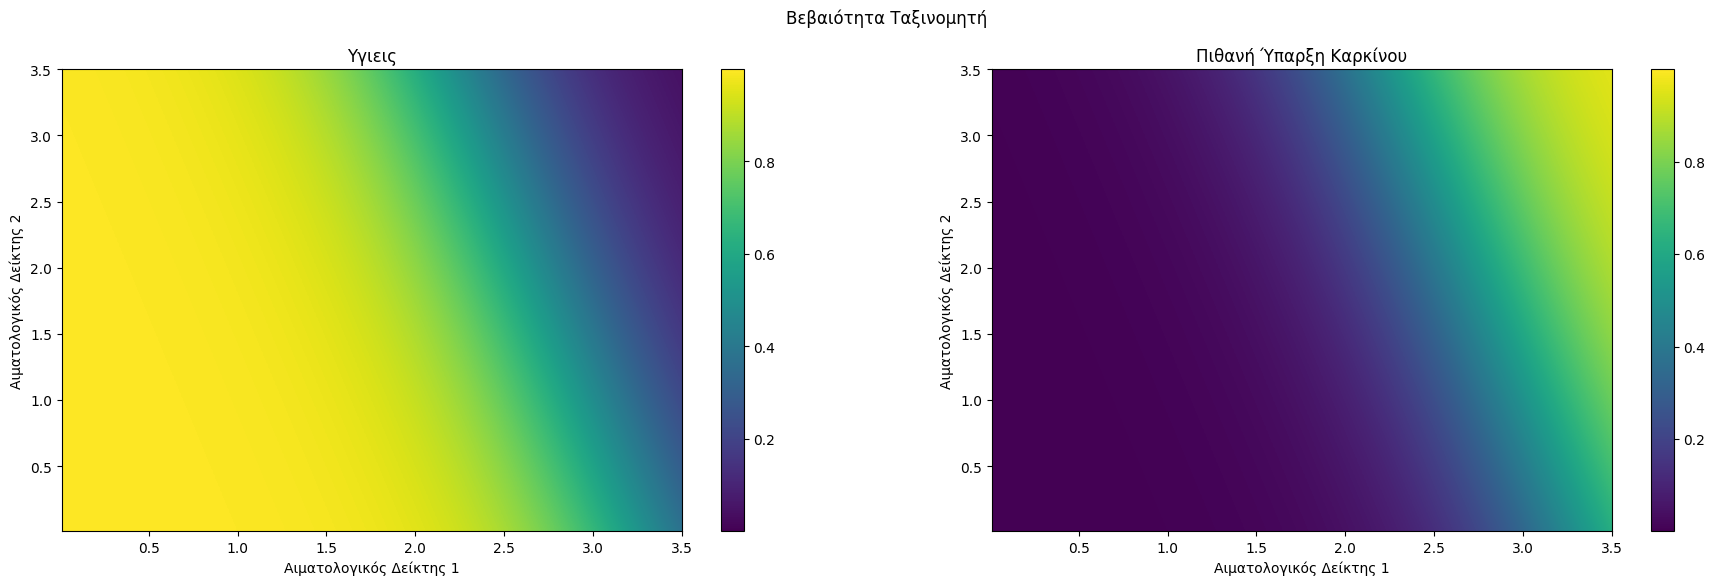

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

fig.suptitle('Βεβαιότητα Ταξινομητή')

im1 = ax1.imshow(healthy_posterior, origin='lower', extent=[0.01,lim[0],0.01,lim[1]], aspect='auto')
ax1.set_xlim([0.01, 3.5])
ax1.set_ylim([0.01, 3.5])
ax1.set_title('Υγιεις')
ax1.set_xlabel('Αιματολογικός Δείκτης 1')
ax1.set_ylabel('Αιματολογικός Δείκτης 2')
plt.colorbar(im1, ax=ax1)

im2 = ax2.imshow(sick_posterior, origin='lower', extent=[0.01,lim[0],0.01,lim[1]], aspect='auto')
ax2.set_xlim([0.01, 3.5])
ax2.set_ylim([0.01, 3.5])
ax2.set_title('Πιθανή Ύπαρξη Καρκίνου')
ax2.set_xlabel('Αιματολογικός Δείκτης 1')
ax2.set_ylabel('Αιματολογικός Δείκτης 2')
plt.colorbar(im2, ax=ax2)
plt.show()

### 4. Μαθηματικό Υπόβαθρο και Υλοποίηση
Υπολογίζουμε το σφάλμα με τον εξής τύπο:
$$P(error) = \int_{-\infty}^{+\infty} P(error,x)dx = \int_{-\infty}^{+\infty} P(error|x)P(x)$$
$$P(error|x) = min [P(ω_1|x), P(ω_2|x)]$$

Επειδή θα θέλαμε ο ταξινομητής στις οριακές συνθήκες (όταν δηλαδή είναι 50, 50 οι πιθανότητες) να μην θεωρεί εύκολα πως κάποιος είναι υγιής, μπορούμε να εισάγουμε την έννοια του ρίσκου.
Το ρίσκο θα αυξήσει το σφάλμα, κάνοντας τον ταξινομητή μας χειρότερο, ταυτόχρονα θα τον κάνει και πιο ασφαλή.

In [11]:
error = np.sum(np.minimum(healthy_posterior, sick_posterior) * evidence * step * step)
error

0.029655234607196785

# Μέρος B
---

### 1. Μαθηματικό Υπόβαθρο και Υλοποίηση

In [12]:
healthy_likelihood = multivariate_normal.pdf(x=grid, mean=m1, cov=S)
sick_likelihood = multivariate_normal.pdf(x=grid, mean=m2, cov=S/4)

### 1. Παρουσίαση Ιατρικών Αποτελεσμάτων

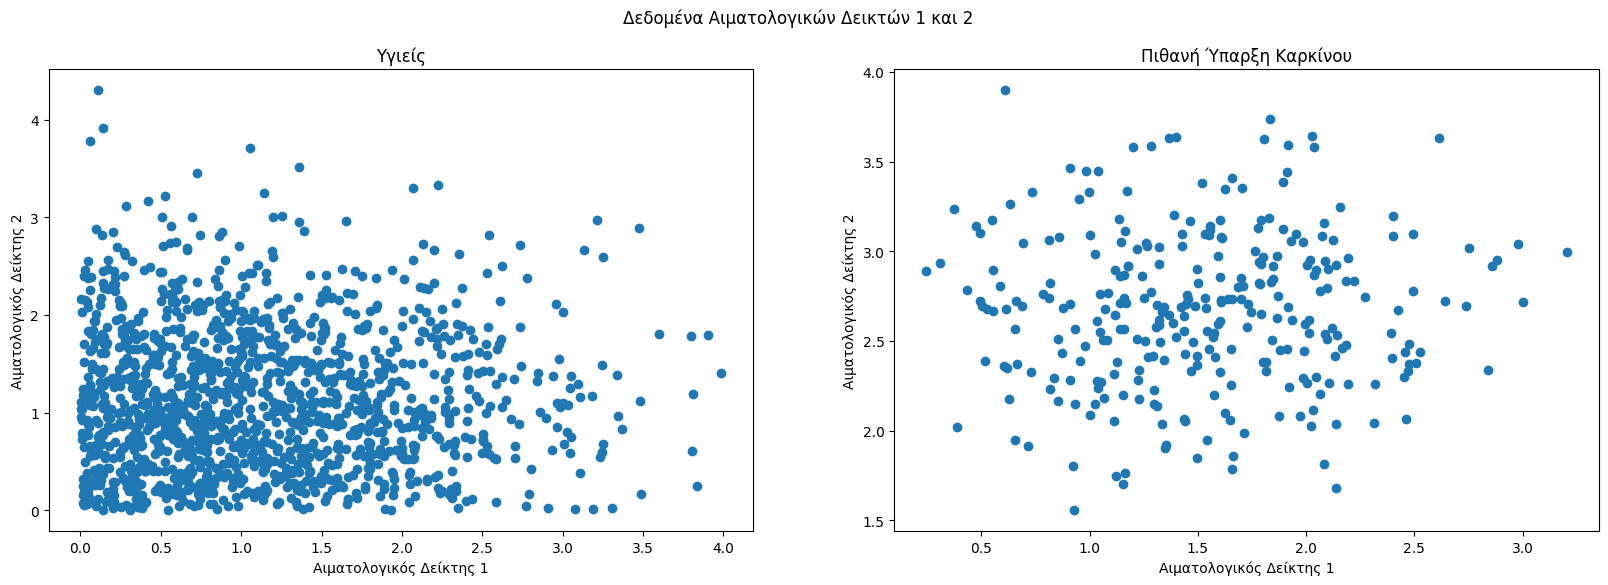

In [13]:
healthy_samples = np.random.multivariate_normal(mean=m1,cov=S, size=2700)
sick_samples = np.random.multivariate_normal(mean=m2,cov=S/4, size=300)
p_healthy_samples = healthy_samples[np.all(healthy_samples > 0, axis=1)]
p_sick_samples = sick_samples[np.all(sick_samples > 0, axis=1)]
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

fig.suptitle('Δεδομένα Αιματολογικών Δεικτών 1 και 2')

axs[0].scatter(p_healthy_samples[:, 0], p_healthy_samples[:, 1])
axs[0].set_title('Υγιείς')
axs[0].set_xlabel('Αιματολογικός Δείκτης 1')
axs[0].set_ylabel('Αιματολογικός Δείκτης 2')

axs[1].scatter(p_sick_samples[:, 0], p_sick_samples[:, 1])
axs[1].set_title('Πιθανή Ύπαρξη Καρκίνου')
axs[1].set_xlabel('Αιματολογικός Δείκτης 1')
axs[1].set_ylabel('Αιματολογικός Δείκτης 2')

plt.show()

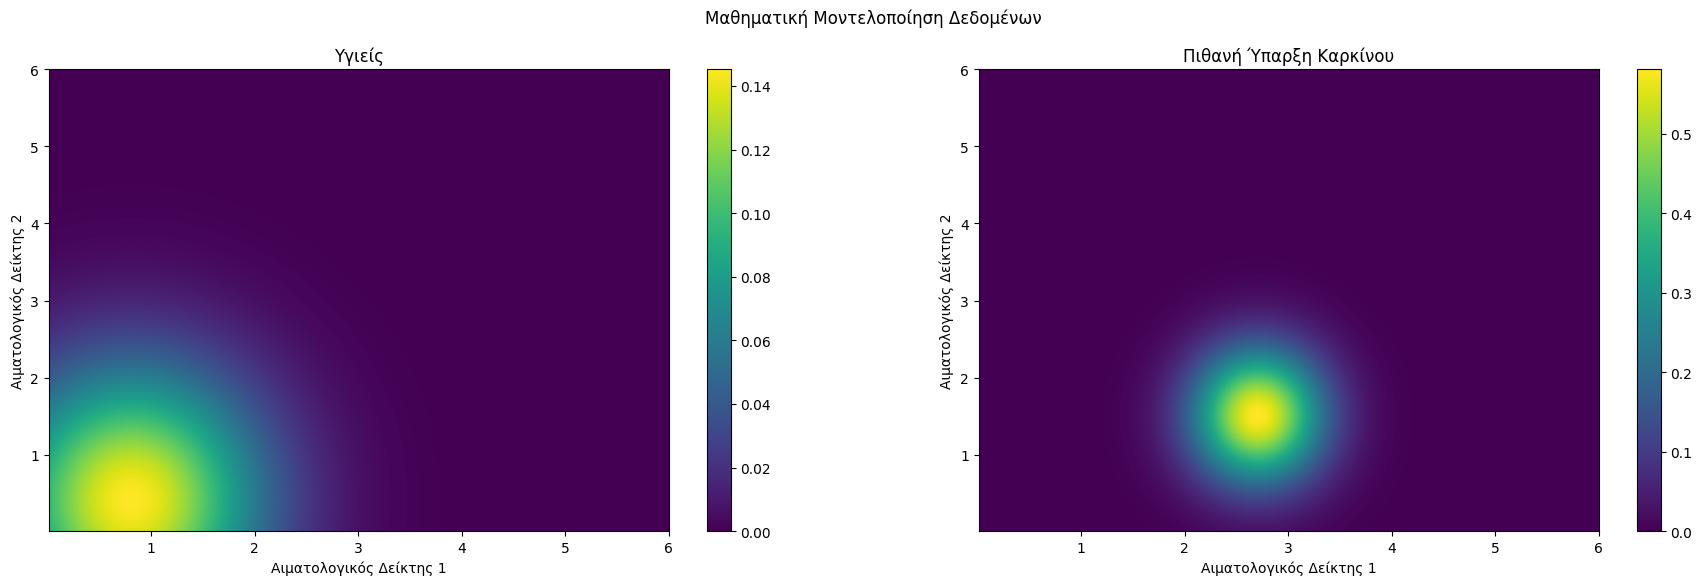

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

fig.suptitle('Μαθηματική Μοντελοποίηση Δεδομένων')

im1 = ax1.imshow(healthy_likelihood, origin='lower', extent=[0.01,lim[0],0.01,lim[1]], aspect="auto")
ax1.set_title('Υγιείς')
ax1.set_xlabel('Αιματολογικός Δείκτης 1')
ax1.set_ylabel('Αιματολογικός Δείκτης 2')
plt.colorbar(im1, ax=ax1)


im2 = ax2.imshow(sick_likelihood, origin='lower', extent=[0.01,lim[0],0.01,lim[1]], aspect="auto")
ax2.set_title('Πιθανή Ύπαρξη Καρκίνου')
ax2.set_xlabel('Αιματολογικός Δείκτης 1')
ax2.set_ylabel('Αιματολογικός Δείκτης 2')
plt.colorbar(im2, ax=ax2)
plt.show()

In [15]:
from skimage.measure import block_reduce
bs1, bs2 = int(np.floor(np.sqrt(S) / step)[0, 0] / 3), int(np.floor(np.sqrt(S) / step)[1, 1] / 3)

healthy_reduced = block_reduce(healthy_likelihood,
                       block_size=(bs1, bs2),
                       func=np.mean,
                       cval=np.mean(healthy_likelihood))

sick_reduced = block_reduce(sick_likelihood,
                       block_size=(bs1, bs2),
                       func=np.mean,
                       cval=np.mean(sick_likelihood))

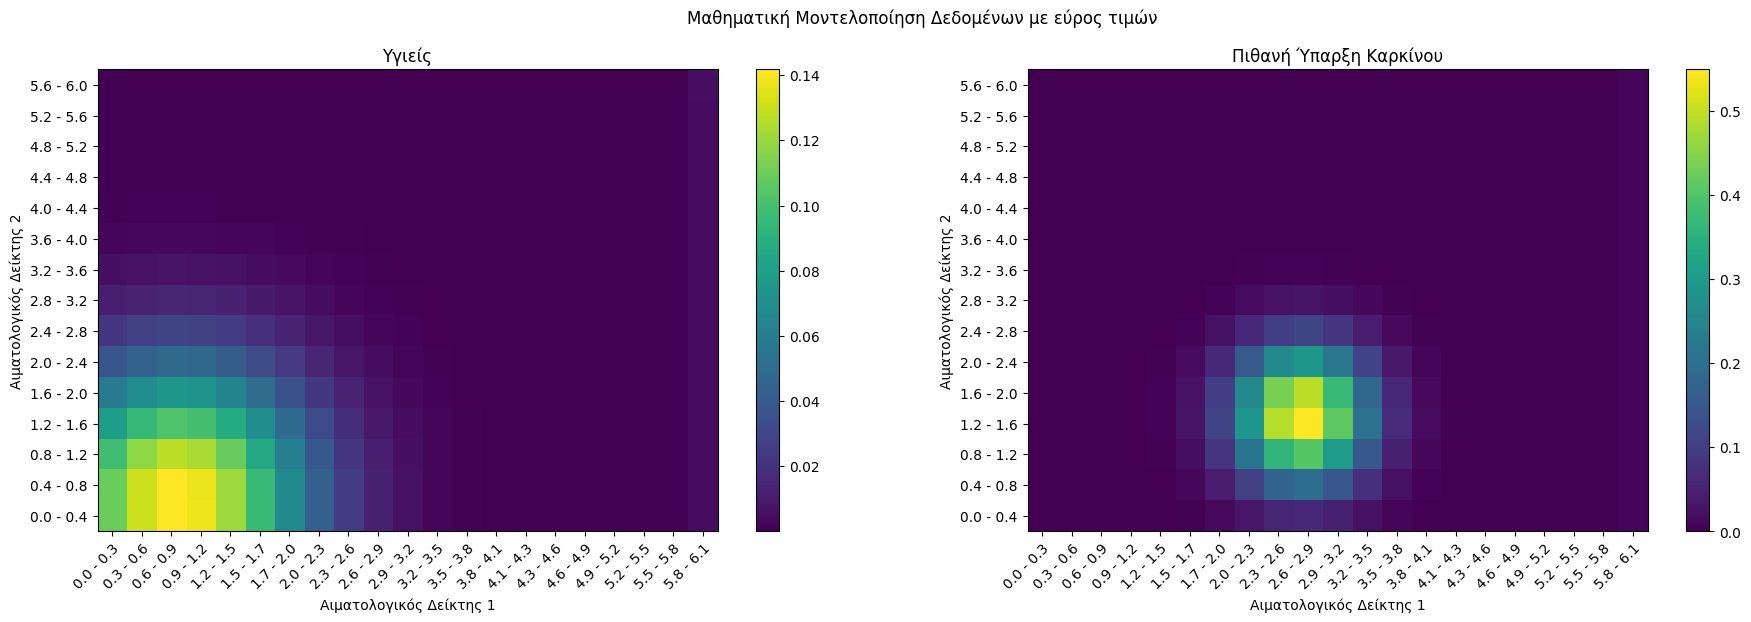

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))
fig.suptitle('Μαθηματική Μοντελοποίηση Δεδομένων με εύρος τιμών')

bs1_labels = []
for i in range(healthy_reduced.shape[0]):
    bs1_labels.append(f'{i* step * bs1:.1f} - {(i+1) * step * bs1:.1f}')

bs2_labels = []
for i in range(healthy_reduced.shape[1]):
    bs2_labels.append(f'{i* step * bs2:.1f} - {(i+1) * step * bs2:.1f}')

ax1.set_xticks(np.arange(len(bs2_labels)))
ax1.set_xticklabels(bs2_labels)
ax1.set_xlabel('Αιματολογικός Δείκτης 1')
ax1.set_ylabel('Αιματολογικός Δείκτης 2')
ax1.set_yticks(np.arange(len(bs1_labels)))
ax1.set_yticklabels(bs1_labels)
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

ax1.set_title("Υγιείς")
im1 = ax1.imshow(healthy_reduced, origin='lower', aspect="auto")
plt.colorbar(im1 ,ax=ax1)

ax2.set_xticks(np.arange(len(bs2_labels)))
ax2.set_xticklabels(bs2_labels)
ax2.set_xlabel('Αιματολογικός Δείκτης 1')
ax2.set_ylabel('Αιματολογικός Δείκτης 2')
ax2.set_yticks(np.arange(len(bs1_labels)))
ax2.set_yticklabels(bs1_labels)
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

ax2.set_title("Πιθανή Ύπαρξη Καρκίνου")
im2 = ax2.imshow(sick_reduced, origin='lower', aspect="auto")
plt.colorbar(im2 ,ax=ax2)

plt.show()

### 2. Μαθηματικό Υπόβαθρο και Υλοποίηση

In [17]:
evidence = healthy_likelihood * healthy_prior + sick_likelihood * sick_prior

### 2. Παρουσίαση Ιατρικών Αποτελεσμάτων

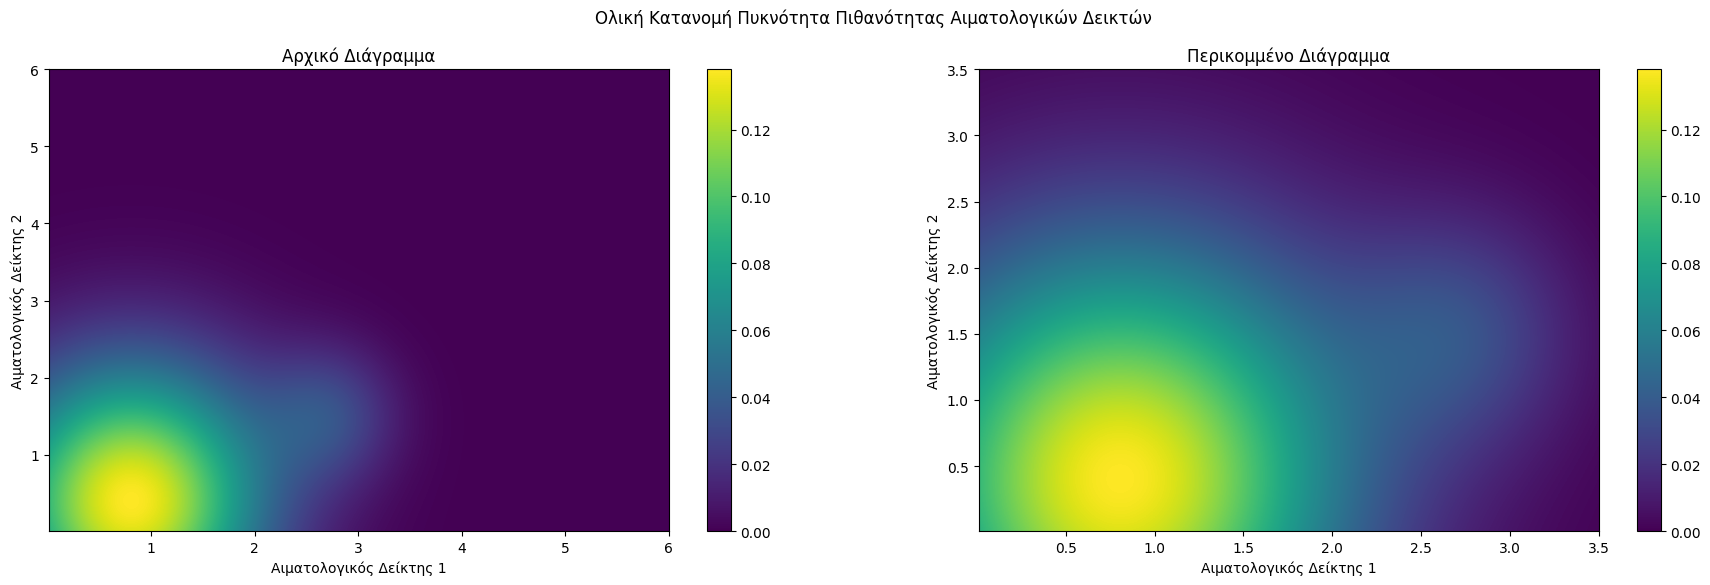

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

fig.suptitle('Ολική Κατανομή Πυκνότητα Πιθανότητας Αιματολογικών Δεικτών')

im1 = ax1.imshow(evidence, origin='lower', extent=[0.01,lim[0],0.01,lim[1]], aspect='auto')
ax1.set_title('Αρχικό Διάγραμμα')
ax1.set_xlabel('Αιματολογικός Δείκτης 1')
ax1.set_ylabel('Αιματολογικός Δείκτης 2')
plt.colorbar(im1, ax=ax1)


im2 = ax2.imshow(evidence, origin='lower', extent=[0.01,lim[0],0.01,lim[1]], aspect='auto')
ax2.set_xlim([0.01, 3.5])
ax2.set_ylim([0.01, 3.5])
ax2.set_title('Περικομμένο Διάγραμμα')
ax2.set_xlabel('Αιματολογικός Δείκτης 1')
ax2.set_ylabel('Αιματολογικός Δείκτης 2')
plt.colorbar(im2, ax=ax2)
plt.show()

### 3. Μαθηματικό Υπόβαθρο και Υλοποίηση

In [19]:
healthy_posterior = (healthy_likelihood * healthy_prior) / evidence
sick_posterior = (sick_likelihood * sick_prior) / evidence

### 3. Παρουσίαση Ιατρικών Αποτελεσμάτων

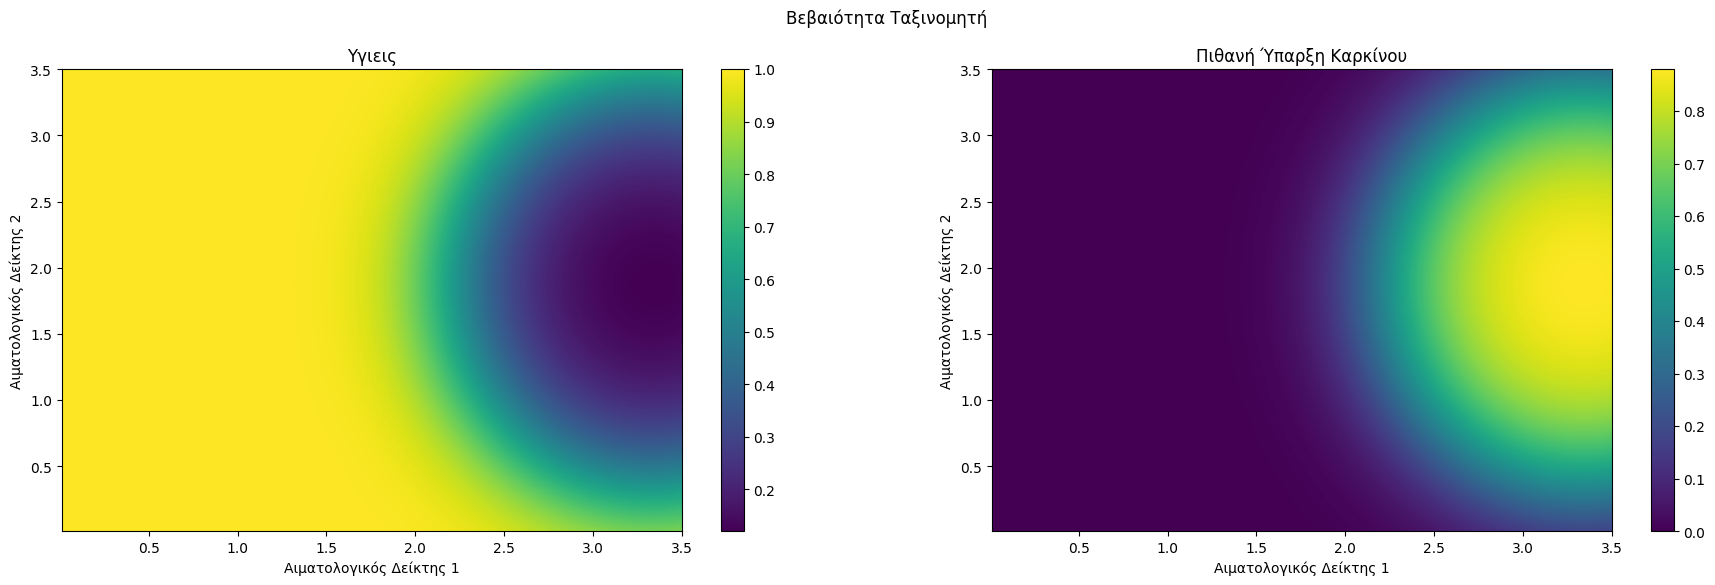

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))

fig.suptitle('Βεβαιότητα Ταξινομητή')

im1 = ax1.imshow(healthy_posterior, origin='lower', extent=[0.01,lim[0],0.01,lim[1]], aspect='auto')
ax1.set_xlim([0.01, 3.5])
ax1.set_ylim([0.01, 3.5])
ax1.set_title('Υγιεις')
ax1.set_xlabel('Αιματολογικός Δείκτης 1')
ax1.set_ylabel('Αιματολογικός Δείκτης 2')
plt.colorbar(im1, ax=ax1)

im2 = ax2.imshow(sick_posterior, origin='lower', extent=[0.01,lim[0],0.01,lim[1]], aspect='auto')
ax2.set_xlim([0.01, 3.5])
ax2.set_ylim([0.01, 3.5])
ax2.set_title('Πιθανή Ύπαρξη Καρκίνου')
ax2.set_xlabel('Αιματολογικός Δείκτης 1')
ax2.set_ylabel('Αιματολογικός Δείκτης 2')
plt.colorbar(im2, ax=ax2)
plt.show()

### 4. Μαθηματικό Υπόβαθρο και Υλοποίηση

Παρατηρούμε πως το σφάλμα είναι μικρότερο κατι που είναι φυσιολογικό, μιας και η συμμεταβλητότητα της δεύτερης κλάσης έχει υποτετραπλασιαστεί. Αυτό, κάνει την
"καμπάνα" της likelihood πιο "στενή" με αποτέλεσμα οι τιμές που ανήκουν στην κλάση 2 να μην αποκλίνουν πολύ από την μέση τιμή και ο ταξινομητής να επιλέγει πιο σίγουρα.


In [21]:
error = np.sum(np.minimum(healthy_posterior, sick_posterior) * evidence * step * step)
error

0.0286640651156394